# Experiment stack
The experiment stack for every aspect of the experiment. Using Ejtemaee et al. paper "Optimization of Yb+ Flourescence and hyperfine-qubit detection"


### $^{171}Yb^+$ structure ###
<p align="center">
    <img src="img/Ybstructure.PNG"  height="600" >
    <img src="img/171Yb_cooling_white.png" height="600">
    <img src="img/171Yb_clebsche_gorden_coeffs.PNG" height="600">
</p>


This is the general structure of $^{171}Yb^+$ ions. I will use this to diagramatically show what each part of the experiment is doing.

The cooling cycle is also shown on the two right images. The very right image shows the Clebsch Gordan Coefficiencients for the transitions.

This experiment stack mostly uses the solution to the Lindblad master equation for the $^2S_{1/2}\leftrightarrow^2P_{1/2}$ optical transition using linearly polarised light travelling perpendicular to the $B_z$ quantization axis. The solution is

\begin{equation}
    \mathcal{P}_{p0} = \frac{3}{4}\frac{\cos^2\theta_{BE}\sin^2\theta_{BE}}{1 + 3 \cos^2\theta_{BE}}\frac{\frac{\Omega^2}{3}}{\Delta^2 + \left(\frac{\Gamma_{171}}{2}\right)^2}
\end{equation}

where 

\begin{equation}
    \left(\frac{\Gamma_{171}}{2}\right)^2 = \left(\frac{\gamma}{2}\right)^2 + \frac{\Omega^2}{3}\cos^2\theta_{BE}\frac{1-3\cos^2\theta_{BE}}{1+3\cos^2\theta_{BE}} + \frac{\cos^2\theta_{BE}}{1+3\cos^2\theta_{BE}}\left(\frac{\Omega^4}{36\delta_B^2} + 4\delta_{BE}^2\right).
\end{equation}

is the effective linewidth. $\Omega$ is the Rabi rate which is defined as

\begin{equation}
    \Omega = \Gamma\sqrt{\frac{I}{2I_0}}.
\end{equation}

$\gamma$ is the linewidth of the transition. Decay from $^2P_{1/2}\, F=0$ state to the low lying $^2D_{3/2} \, F=1$ state as well as the counter effect of the 935 nm repump laser is accounted for using

\begin{equation}
    P_{p0}^{(r)} = \frac{\mathcal{P}_{p0}(\alpha=0)}{1 + \xi \mathcal{P}_{p0}(\alpha=0)},
\end{equation}

where the repump factor $\xi$ is defined as

\begin{equation}
    \xi = \frac{\alpha\gamma}{\beta\gamma_{IR}}\frac{1}{\mathcal{P}_{[3/2]}(\beta=0)}.
\end{equation}

$\alpha$ and $\beta$ are the branching ratios for spontaneous decay from $^2P_{1/2}$ to $^2D_{3/2}$ and $^3D[3/2]_{1/2}$ to $^2S_{1/2}$ respectively. $\mathcal{P}_{[3/2]}$ is calculated using (1), just with $\gamma=\gamma_{IR}$ and the Rabi rate for the transition with the 935 nm laser.

## General library functionality ##
This library requires the following packages

In [1]:
# Importing dependencies
import numpy as np
import matplotlib.pyplot as plt

The `ion_model` library has two general classes for modelling the ions dynamics `Yb171` and `Yb174` corresponding to $^{171}Yb^+$ and $^{174}Yb^+$ respectively. They follow the general class structure of the `Yb` class. The `Yb` class contains all of the constants of both the isotopes, including branching ratios, decay rates, energy splittings etc. It also contains some common methods such as the Zeeman shift, rabi freq etc. 

In [42]:
from ion_model import Yb171, Yb174
from pprint import pprint

# Yb data
yb171 = Yb171()
print("Yb constants")
pprint(yb171.__dict__)

Yb constants
{'Gamma_2D32': 18.975332068311197,
 'Gamma_2P12': 123456790.12345679,
 'Gamma_3D32': 26525198.938992042,
 'I370sat': 507.8061565261792,
 'I935sat': 6.711521946069018,
 'branch_ratio_2P12_2D32': 0.018000000000000016,
 'branch_ratio_3D3212_2S12': 0.982,
 'excited_lifetime_2D32': 0.0527,
 'excited_lifetime_2P12': 8.1e-09,
 'excited_lifetime_3D32': 3.77e-08,
 'gamma_2D32_3D3212': 26389378.290154263,
 'gamma_2S12_2P12': 123150432.02071989,
 'hyperfine_splitting_2D32': 5403539364.174444,
 'hyperfine_splitting_2P12': 13226105071.61303,
 'hyperfine_splitting_2S12': 79438311838.67151,
 'hyperfine_splitting_3D32': 13885839528.866886,
 'lambda_2D32_3D3212': 9.352e-07,
 'lambda_2S12_2P12': 3.695e-07,
 'mu_b': 87941000538.0187,
 'optimal_thetaBE': 0.9553166181245092,
 'zeeman_P_state_proportion': 0.3333333333333333,
 'zeeman_S_state_proportion': 1}


In [23]:
print("\nYb methods")
pprint([var for var in dir(yb171) if '__' not in var and callable(getattr(yb171, var))])


Yb methods
['effective_linewidth',
 'eta',
 'excited_population_no_leakage',
 'excited_population_with_leakage',
 'rabi_freq',
 's0',
 'zeeman_shift']


There are also functions that make generating plots easy. These include `calculate_171_pop` and `calculate_174_pop`. These functions take in the following parameters

```
detuning: Union[np.array, float],
I935: Union[np.array, float, None] = None,
I370: Union[np.array, float, None] = None,
thetaBE: Union[np.array, float, None] = None,
b_field: Union[PolarVector, None] = None,
e_field: Union[PolarVector, None] = None,
b_mag: Union[np.array, float, None] = None,
zeeman: Union[np.array, float, None] = None,
s_370: Union[np.array, float, None] = None,
s_935: Union[np.array, float, None] = None
```

They return

```
excited_pop: Union[np.ndarray, float],   # Excited state population as a function of the variables
mesh: Union[np.ndarray, float],          # A meshgrid of the variables
yb171: Yb,                               # The Yb171 or Yb174 class
cart: ,                                  # The cartesian coordinates of the Efield and Bfield vectors if they are given using as PolarVectors
other_data                               # A dictionary of other data that could be useful for plotting. This includes
                                         # {370: {"s0": mesh.s0_370,
                                         #          "rabi": rabi_370,
                                         #          "zeeman": mesh.zeeman,
                                         #          "linewidth": eff_linewidth_370,
                                         #          "pop": excited_pop_370},
                                         #  935: {"s0": mesh.s0_935,
                                         #          "rabi": rabi_935,
                                         #          "linewidth": eff_linewidth_935,
                                         #          "pop": excited_pop_935},
                                         #  "eta": eta}
```


### Sweeping the polarisation of the 370 nm laser ###
This is done experimentally using the ConOptics EOM. It has the effect of changing from pumping only $\pi$ transitions (population trapping on the $m_F=\pm 1$ Zeeman sub-levels), to equal pumping of $\pi$, $\sigma^\pm$ and then pumping of the $\sigma^\pm$ transitions and no $\pi$. See Image for example
<p align="center">
    <img src="img/Polarisation_sweep.png" height="600">
</p>

(a) shows the optical pumping into the $m_F=\pm 1$ Zeeman levels due to pure a $\pi$ transition. This occurs when $\theta_{BE}=\frac{\pi}{2}$, where $\theta_{BE}$ is the angle between the electric field of the cooling laser and the magnetic field $B_z$. (b) shows the maximum flouresence when all three transitions are $\sigma^\pm$, $\pi$ are driven equally. This occurs when $\theta_{BE}=\cos^{-1}(\frac{1}{\sqrt{3}})$. This is calculated from the Clebsch-Gordan coefficients. (c) shows optical pumping into the $m_F=0$ Zeeman state due to an equal amount of $\sigma^\pm$ pumping and no $\pi$ pumping. This occurs when $\theta_{BE}=\pi$. 

This can be simulated using the following code;

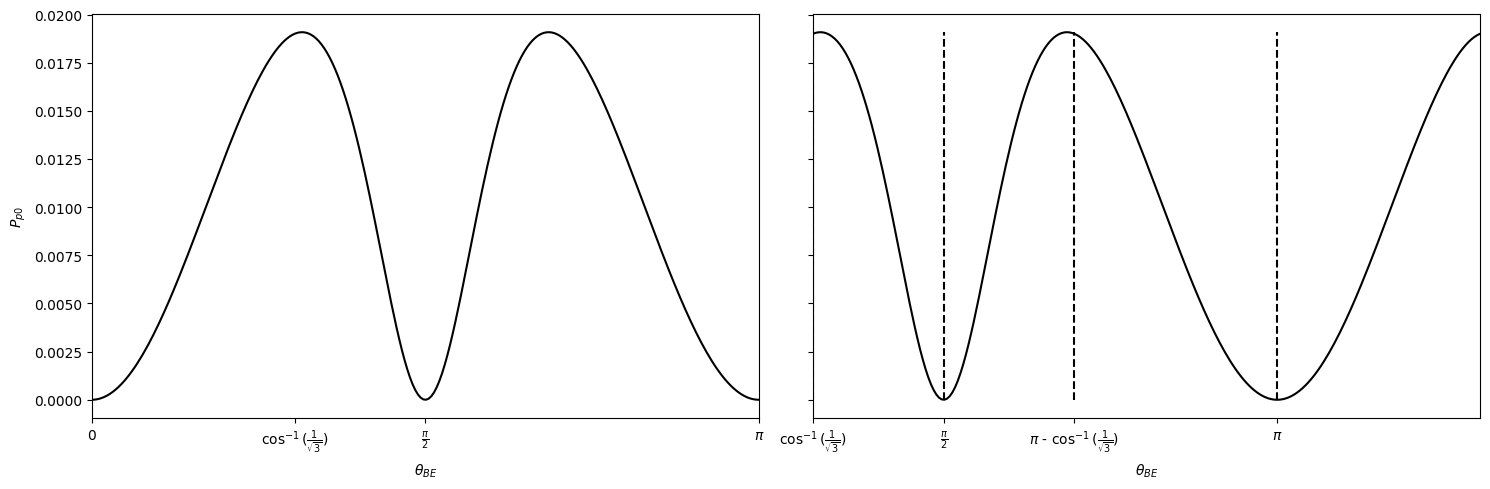

In [43]:
from ion_model import calculate_171_pop, Yb171


# define the polarisation sweep
thetaBE = np.linspace(0, 2*np.pi, 500)
# define other constants
yb171 = Yb171()
s370 = 1                            # At saturation
s935 = 1                            # At saturation
zeeman = 0.5 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning = 0.5 * yb171.Gamma_2P12   # Detuning from excited state by half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning, s_370=s370, s_935=s935, zeeman=zeeman, thetaBE=thetaBE)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
ax1.plot(mesh.thetaBE, excited_pop, color='k')
ax1.set_xlim(0, np.pi)
ax1.set_xticks([0, np.arccos(1/np.sqrt(3)), np.pi/2, np.pi])
ax1.set_xticklabels(["0", r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", "$\pi$"])

ax2.plot(mesh.thetaBE, excited_pop, color='k')
ax2.set_xlim(np.arccos(1/np.sqrt(3)), np.arccos(1/np.sqrt(3))+np.pi)
ax2.set_xticks([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi])
ax2.set_xticklabels([r"$\cos^{-1}(\frac{1}{\sqrt{3}})$", r"$\frac{\pi}{2}$", r"$\pi$ - $\cos^{-1}(\frac{1}{\sqrt{3}})$", "$\pi$"])

ax2.vlines([np.arccos(1/np.sqrt(3)), np.pi/2, np.pi - np.arccos(1/np.sqrt(3)), np.pi], ymin=0, ymax=max(excited_pop), color='k', linestyles='--')

ax1.set_ylabel(r'$P_{p0}$')
ax1.set_xlabel(r'$\theta_{BE}$')
ax2.set_xlabel(r'$\theta_{BE}$')

plt.tight_layout()
plt.show()


### Sweeping saturation parameter $s$ of 370 nm laser ###
In $^{171}Yb^+$ ions, as you increase the saturation parameter $s$ for the 370 nm transition, you can get population trapping (for some reason). Increasing the Zeeman splitting destabilises the trapping. This can be modelled using the following

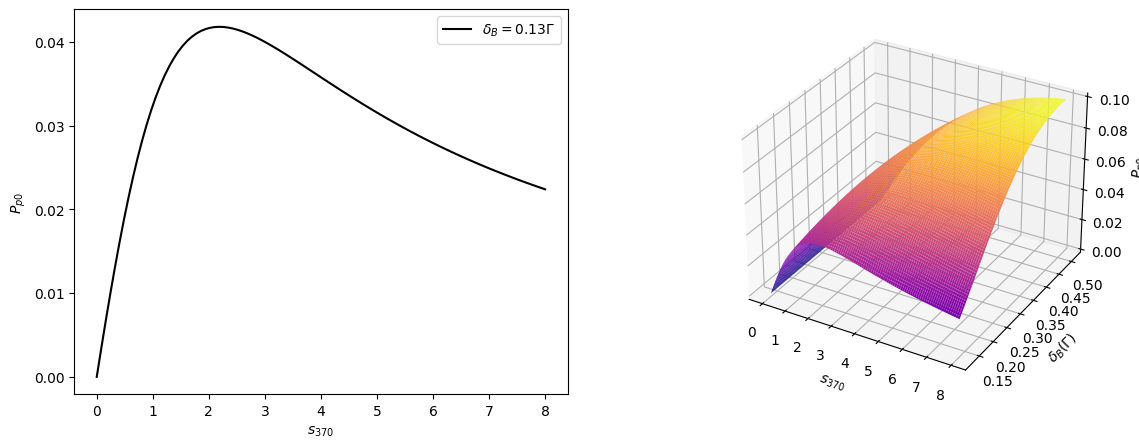

In [75]:
from ion_model import calculate_171_pop, Yb171

yb171 = Yb171()

# define the polarisation sweep
thetaBE = yb171.optimal_thetaBE
# define other constants
s370 = np.linspace(0, 8, 100)       # At saturation
s935 = 1                            # At saturation
zeeman = 0.13 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning = 5e6 * 2 * np.pi           # Detuning set to -5 MHz

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning, s_370=s370, s_935=s935, zeeman=zeeman, thetaBE=thetaBE)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(mesh.s0_370, excited_pop, color='k', label=r'$\delta_B=0.13\Gamma$')

zeeman = np.linspace(0.13, 0.51, 100)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12, thetaBE=thetaBE)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(mesh.s0_370, mesh.zeeman / yb171.Gamma_2P12, excited_pop, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
ax2.set_xlabel('$s_{370}$')
ax2.set_ylabel('$\delta_B(\Gamma)$')
ax2.set_zlabel("$P_{p0}$")

ax.set_xlabel('$s_{370}$')
ax.set_ylabel('$P_{p0}$')
ax.legend()

# plt.tight_layout()
plt.show()

Notice in the code for plotting the second graph we used two variables set using np.arrays `s_370` and `zeeman`. When we put these arrays into the `calculate_171_pop` function we get a `mesh` object as the second result. The `mesh` object contains the objects
```
"thetaBE", 
"detuning", 
"s0_370", 
"s0_935", 
"zeeman"
```
This can be easily printed from the mesh object itself

In [77]:
pprint(list(mesh.__dict__.keys()))

['poss_arrays',
 'names',
 'thetaBE',
 'detuning',
 's0_370',
 's0_935',
 'zeeman',
 'variables_forming_meshgrid',
 'mesh_order',
 'variables_names',
 'mesh_shape']


Note that `names` is just a holder of the names given above. `mesh_order` and `mesh_shape` can be used to help figure out what axes represents different variables if using multi-dimensional arrays. 

### Sweeping 370 nm detuning $\Delta$ ###
Looking at eq.(1), then it is clear that by sweeping $\Delta$ we get a Lorentzian with a HWHM of $\frac{\Gamma_{171}}{2}$. This can be simulated using the following

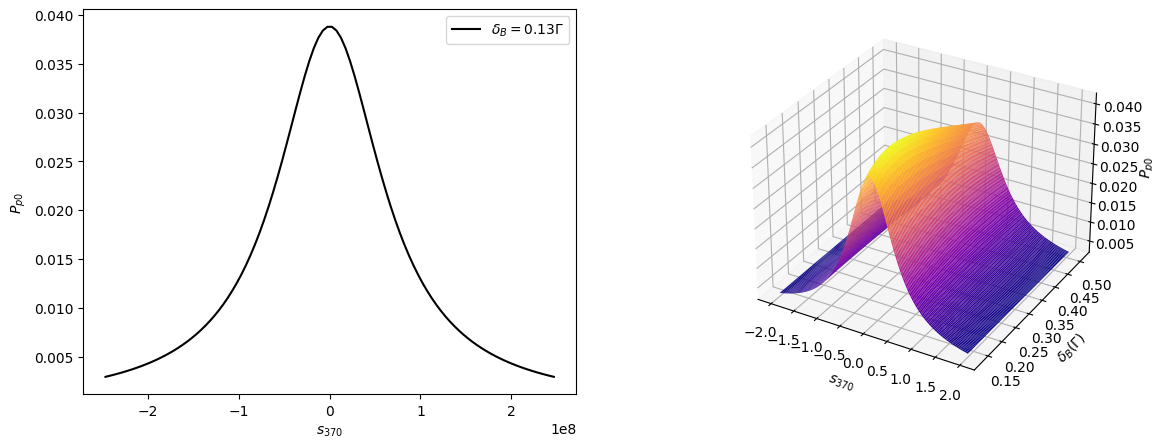

In [79]:
from ion_model import calculate_171_pop, Yb171

yb171 = Yb171()

# define the polarisation sweep
thetaBE = yb171.optimal_thetaBE
# define other constants
s370 = 1                            # At saturation
s935 = 1                            # At saturation
zeeman = 0.13 * yb171.Gamma_2P12     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition
detuning = np.linspace(-2, 2, 100) * yb171.Gamma_2P12  # Detuning set to -5 MHz

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning, s_370=s370, s_935=s935, zeeman=zeeman, thetaBE=thetaBE)

fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(mesh.detuning, excited_pop, color='k', label=r'$\delta_B=0.13\Gamma$')

zeeman = np.linspace(0.13, 0.51, 100)     # half of the linewidth of the 2S1/2 <-> 2P1/2 transition

# Calculate the population
excited_pop, mesh, yb171, cartesian, other = calculate_171_pop(detuning, s_370=s370, s_935=s935, zeeman=zeeman * yb171.Gamma_2P12, thetaBE=thetaBE)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(mesh.detuning / yb171.Gamma_2P12, mesh.zeeman / yb171.Gamma_2P12, excited_pop, cmap='plasma', rstride=1, cstride=1, edgecolor='none')
ax2.set_xlabel('$\Delta_{370}$')
ax2.set_ylabel('$\delta_B(\Gamma)$')
ax2.set_zlabel("$P_{p0}$")

ax.set_xlabel('$\Delta_{370}$')
ax.set_ylabel('$P_{p0}$')
ax.legend()

# plt.tight_layout()
plt.show()